In [334]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt


In [335]:
#Retrive gold time series from  "Historical_series.xlsx"
#sheet Gold with daily and wekly data

xls = pd.ExcelFile("Historical_series.xlsx")
GLD = pd.read_excel(xls, "Gold", header=None).drop([0])
new_header=GLD.iloc[0]
GLD.columns=new_header
GLD=GLD[1:]
GLD=GLD.reset_index(drop=True)
GLD = GLD.loc[:, GLD.columns.notna()]
GLD = GLD.T.drop_duplicates().T
GLD = GLD.iloc[:,0:4]
GLD.columns = ['Date', 'AdjClose', 'avg10', 'avg50']


In [336]:
#Download gold daily data from yahoo database

ticker = 'GC=F'
period1 = int(time.mktime(datetime.datetime(2000, 8, 30, 23, 59).timetuple())) #year,month,day,hour,minute
period2 = int(time.mktime(datetime.datetime(2022, 2, 11, 23, 59).timetuple()))
interval = '1d' # 1d, 1m, 1wk

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

goldy = pd.read_csv(query_string)

In [337]:
#Clean goldy dataset

goldy = goldy.dropna()
goldy['Date'] = pd.to_datetime(goldy['Date'])


In [338]:
#merging the two dataset

GLD_final = pd.merge(GLD,goldy,on='Date')

In [339]:
#Cleaning of GLD_final

GLD_final = GLD_final.drop(GLD_final.columns[8],axis=1)
GLD_final = GLD_final.set_index('Date')



In [340]:
#Adding avarage mean 7,100,200,253 days
GLD_final["avg7"] = GLD_final["AdjClose"].rolling(window =7).mean()
GLD_final["avg100"] = GLD_final["AdjClose"].rolling(window =100).mean()
GLD_final["avg200"] = GLD_final["AdjClose"].rolling(window =200).mean()
GLD_final["avg253"] = GLD_final["AdjClose"].rolling(window =253).mean()

In [341]:
#adding SPD_OPEN/CLOSE, SPD_HIGH/LOW and %price variation on gold commodity
GLD_final["SPD_OPEN/CLOSE"] = (GLD_final['Close'] - GLD_final['Open'])

GLD_final['SPD_HIGH/LOW'] = (GLD_final['High']-GLD_final['Low'])


GLD_final['prevAdjClose'] = GLD_final.AdjClose.shift(1)
GLD_final['%varAdjClose'] = ((GLD_final['AdjClose'] / GLD_final['prevAdjClose'])-1)*100


In [342]:
#Positive and negative counting

pos_count_GLD, neg_count_GLD = 0,0

for num in GLD_final['%varAdjClose']:
    if num >= 0:
        pos_count_GLD += 1
    else:
        neg_count_GLD += 1

print(f"Positive closing gold: {pos_count_GLD}")
print(f"Negative closing gold: {neg_count_GLD}")

Positive closing gold: 2835
Negative closing gold: 2507


In [343]:
#AdjClose to binary

positive_string_GLD = []

for i in GLD_final['%varAdjClose']:
    if i > 0:
        positive_string_GLD.append(1)
    else:
        positive_string_GLD.append(0)

GLD_final['pos_string'] = positive_string_GLD

In [344]:
GLD_final = GLD_final.fillna(0)

In [345]:
GLD_final = GLD_final[['AdjClose','Open','High','Low','Close','Volume','avg7','avg10','avg50','avg100','avg200','avg253','SPD_OPEN/CLOSE','SPD_HIGH/LOW', 'prevAdjClose','%varAdjClose','pos_string']]

In [346]:
GLD_final

,AdjClose,Open,High,Low,Close,Volume,avg7,avg10,avg50,avg100,avg200,avg253,SPD_OPEN/CLOSE,SPD_HIGH/LOW,prevAdjClose,%varAdjClose,pos_string
Date,,,,,,,,,,,,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2000-08-31,278.299988,274.799988,278.299988,274.799988,278.299988,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,3.500000,273.899994,1.606424,1
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,278.299988,-0.467117,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,277.000000,-0.433217,0
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.799988,-0.580122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,1820.599976,1812.199951,1821.300049,1809.099976,1820.599976,601.0,1802.799997,1809.550000,1802.333994,1796.047992,1805.078495,1793.607902,8.400025,12.200073,1806.599976,0.774936,1
2022-02-08,1826.599976,1818.900024,1827.599976,1815.000000,1826.599976,108.0,1808.757132,1806.940002,1803.159993,1796.819991,1805.321495,1793.573514,7.699952,12.599976,1820.599976,0.329562,1
2022-02-09,1835.199951,1825.400024,1835.199951,1825.300049,1835.199951,683.0,1814.499983,1807.469995,1804.217991,1797.553990,1805.631495,1793.552170,9.799927,9.899902,1826.599976,0.470819,1


## **Graphing the recessions periods**

In [347]:
# read in data
rec_data = pd.read_csv("USREC.csv") # download the US recession periods from FRED.com


In [348]:
GLD_rec = GLD_final.iloc[:,0]
GLD_rec = pd.DataFrame(data=GLD_rec)
GLD_rec.reset_index(level=0, inplace=True)

In [349]:
rec_data['DATE'] = pd.to_datetime(rec_data['DATE'])

In [350]:
#enlarging data for data visualization
rec_data["USREC"] = np.where(rec_data['USREC']==1, 150 , 0) 

In [351]:
#resampling recession data to daily to keep it uniform with stock data
dy = rec_data.set_index('DATE').resample('D').ffill().reset_index()

(10592.0, 18993.0)

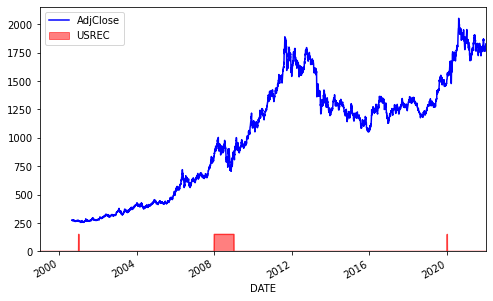

In [352]:
fig, ax = plt.subplots()
GLD_rec.plot.line(ax=ax, figsize=(8, 5), x='Date', color="blue")
dy.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.5, color="red")
plt.xlim("1999-01-01", "2022-01-01")
